# Just standard orbit plotting

In [47]:
from astropy import units as u

from poliastro.bodies import Mercury,Venus, Earth, Mars, Jupiter,Saturn, Uranus,Neptune,Pluto, Sun
from poliastro.twobody import Orbit

In [2]:
r = [-6045, -3490, 2500] * u.km
v = [-3.457, 6.618, 2.533] * u.km / u.s

orb = Orbit.from_vectors(Earth, r, v)

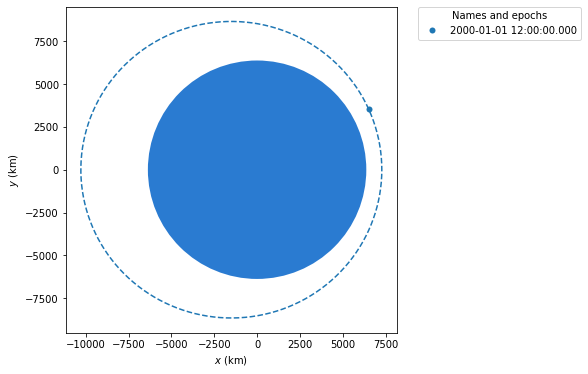

In [3]:
orb.plot();

# Showing some of the NEOs with reelation to the inner planet orbits

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from poliastro.plotting import OrbitPlotter2D, StaticOrbitPlotter

from poliastro.ephem import Ephem

from astropy.coordinates import solar_system_ephemeris

In [6]:
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['font.size'] = 20

In [7]:
data = pd.read_csv('./results.csv')

In [87]:
orbits = []
for i in range(100):
    asteroid1 = data.iloc[i]
    a = asteroid1['a'] * u.AU
    ecc = asteroid1['e'] * u.one
    inc =  asteroid1['i'] * u.deg
    raan = asteroid1['om'] * u.deg
    argp = asteroid1['w'] * u.deg
    nu = asteroid1['ma'] * u.deg
    orb = Orbit.from_classical(Sun,a,ecc,inc,raan,argp,nu)
    orbits.append(orb)

/Users/galois/.pyenv/versions/3.6.9/envs/Asteroids/lib/python3.6/site-packages/astropy/units/decorators.py:251: UserWarning:

Wrapping true anomaly to -π <= nu < π



In [40]:
solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [42]:
from astropy import time
epoch = time.Time("2020-04-29 10:43")  # UTC by default

In [48]:
mercury = Ephem.from_body(Mercury, epoch.tdb)
venus = Ephem.from_body(Venus, epoch.tdb)
earth = Ephem.from_body(Earth, epoch.tdb)
mars = Ephem.from_body(Mars, epoch.tdb)
jupiter = Ephem.from_body(Jupiter, epoch.tdb)
saturn = Ephem.from_body(Saturn, epoch.tdb)
mercury = Ephem.from_body(Mercury, epoch.tdb)
mercury = Ephem.from_body(Mercury, epoch.tdb)

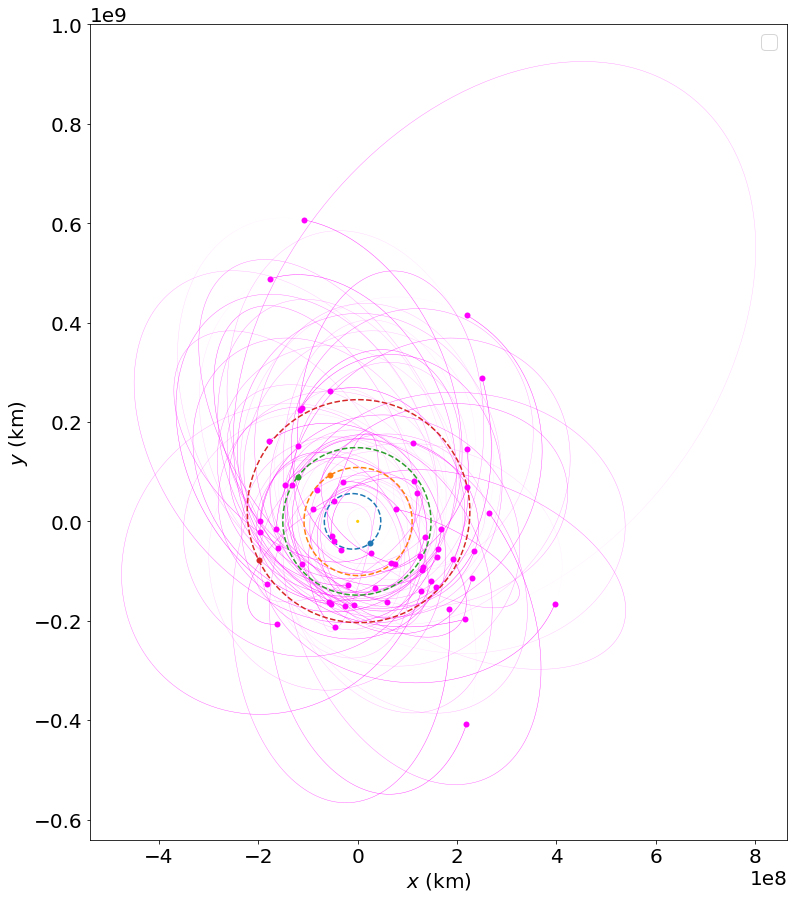

In [88]:
plt.figure(figsize=(15,15))
plotter = StaticOrbitPlotter(ax=plt.gca())
plotter.plot(mercury_orb,label="Mercury")
plotter.plot(venus_orb,label="Venus")
plotter.plot(earth_orb,label="Earth")
plotter.plot(mars_orb,label="Mars")
for i,orb in enumerate(orbits[:60]):
    a = plotter.plot(orb,label='asteroid' + str(i),trail=True,color='magenta')[0]
    a.set_linestyle('-')
    a.set_linewidth(.4)
plt.legend([])

